In [7]:
# # harmonic_curve.ipynb

# import numpy as np
# import matplotlib.pyplot as plt
# from dataclasses import dataclass

# # Set plotting style
# plt.style.use('seaborn-v0_8-darkgrid')

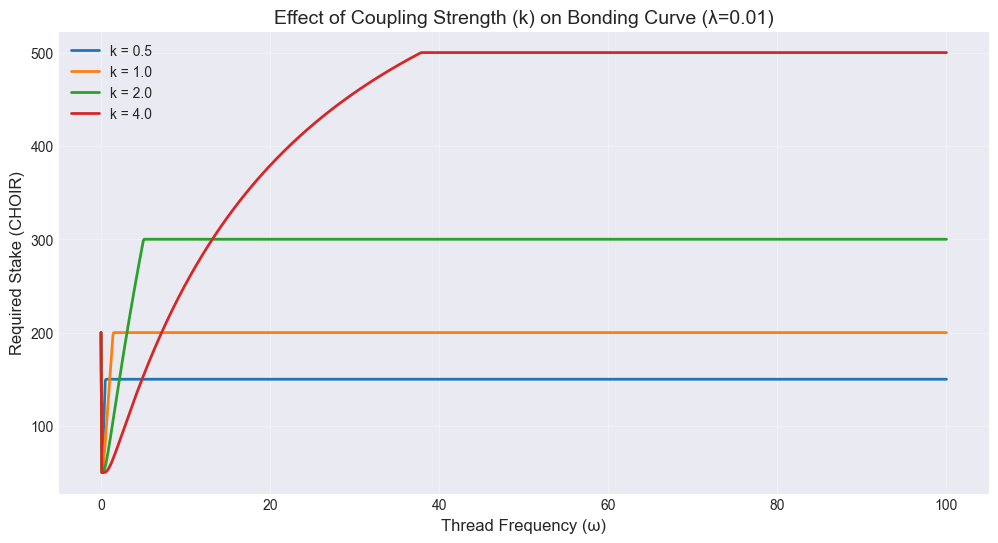

In [14]:
# quantum_harmonic.ipynb

import numpy as np
import matplotlib.pyplot as plt
from dataclasses import dataclass

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')

@dataclass
class Thread:
    """Thread state representation"""
    message_rate: float    # Messages per day
    co_author_count: int   # Number of co-authors
    token_balance: float   # Total tokens held
    approval_rate: float   # 0-1, proportion of specs approved
    age_days: int         # Thread age in days

def calculate_thread_frequency(thread: Thread) -> float:
    """Calculate ω (thread's natural frequency)"""
    α1, α2, α3 = 0.5, 2.0, 0.1  # Weighting coefficients

    return (
        α1 * thread.message_rate +      # Direct activity
        α2 * thread.co_author_count +   # Oscillator coupling
        α3 * np.log1p(thread.token_balance)  # Energy state
    )

def calculate_thread_temperature(thread: Thread) -> float:
    """Calculate T (thread's temperature/volatility)

    In QHO, temperature represents the system's thermal energy:
    - Higher energy states = higher temperature
    - More oscillators = more degrees of freedom = higher temperature
    - Energy dissipates over time (cooling)
    """
    β1 = 0.02  # Energy-to-temperature conversion

    # Energy is proportional to:
    # - Token balance (potential energy)
    # - Message rate (kinetic energy)
    # - Number of oscillators (degrees of freedom)
    energy = (
        thread.token_balance * thread.message_rate * thread.co_author_count
    )

    # Temperature follows energy with natural cooling over time
    return β1 * energy / (1 + np.sqrt(thread.age_days))

def calculate_stake_required(thread: Thread, S0: float = 100, ℏ: float = 1.0, k: float = 1.0, λ: float = 0.01) -> float:
    """Calculate required stake using quantum harmonic oscillator formula"""
    ω = calculate_thread_frequency(thread)
    T = calculate_thread_temperature(thread)

    # Amplify coupling effect
    E = ℏ * ω * k * (1 - λ)  # Energy with stronger coupling influence

    # Handle edge cases
    if T <= 0:
        return S0 * 2.0  # Higher maximum stake

    exp_term = np.exp(E/T) - 1  # Removed k from denominator to increase sensitivity
    if exp_term <= 0:
        return S0 * 0.5  # Ground state energy

    stake = S0 * (0.5 + 1/exp_term)

    # Add coupling-dependent maximum
    max_stake = S0 * (1 + k)  # Maximum stake scales with coupling strength

    return min(stake, max_stake)

def plot_coupling_comparison(k_values=[0.5, 1.0, 2.0, 4.0], λ: float = 0.01):
    """Compare different k values with more dramatic effects"""
    frequencies = np.linspace(0, 100, 1000)
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    S0 = 100

    plt.figure(figsize=(12, 6))

    for k, color in zip(k_values, colors):
        stakes = []
        for ω in frequencies:
            thread = Thread(
                message_rate=ω,
                co_author_count=5,
                token_balance=1000,
                approval_rate=0.8,
                age_days=30
            )
            stake = calculate_stake_required(thread, S0=S0, k=k, λ=λ)
            stakes.append(stake)

        plt.plot(frequencies, stakes, label=f'k = {k}', color=color, linewidth=2)

    plt.xlabel('Thread Frequency (ω)', fontsize=12)
    plt.ylabel('Required Stake (CHOIR)', fontsize=12)
    plt.title(f'Effect of Coupling Strength (k) on Bonding Curve (λ={λ})', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.show()

plot_coupling_comparison()


Simulating rapid_growth: Thread experiencing viral growth


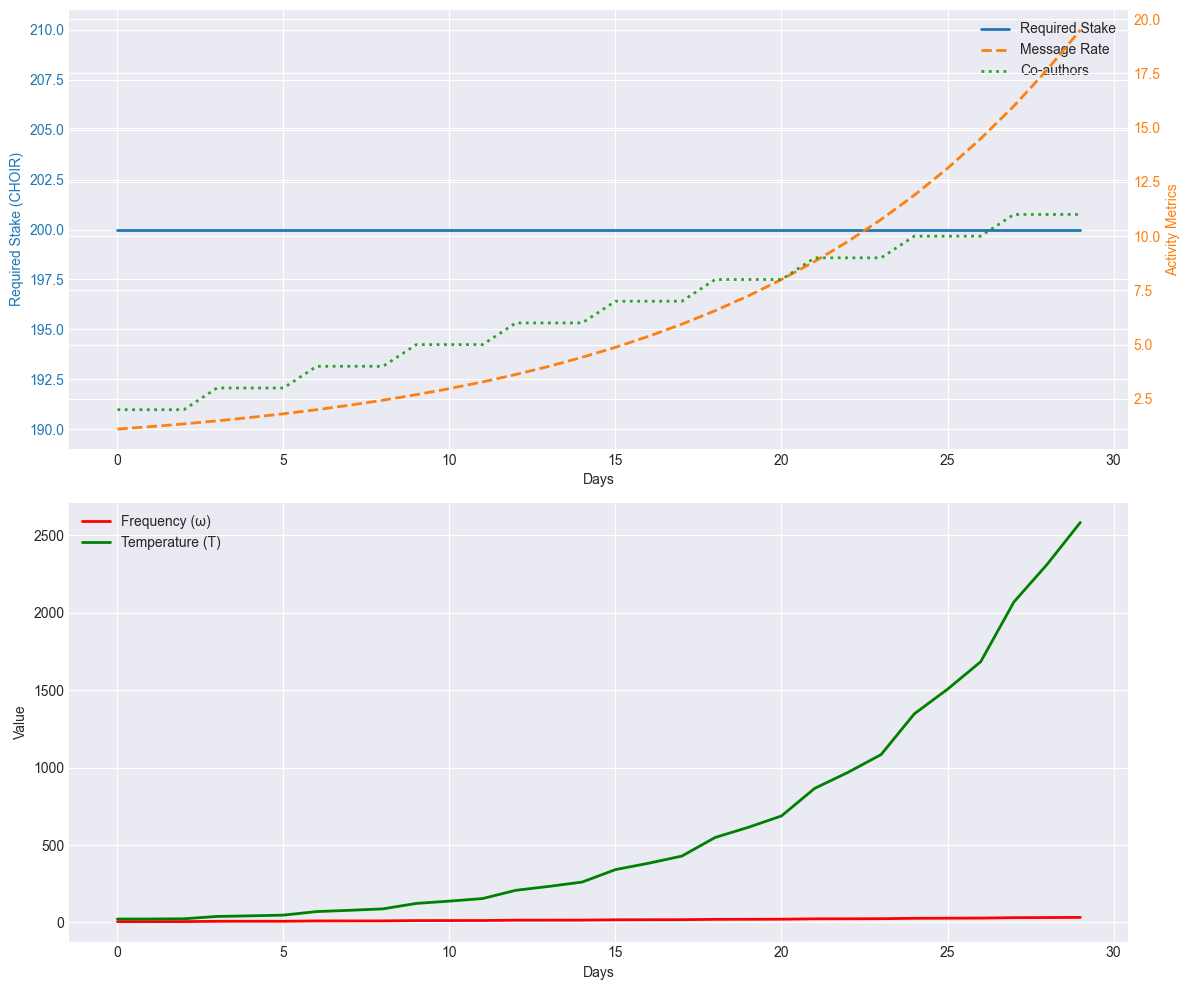


Simulating decay: Thread losing activity and authors


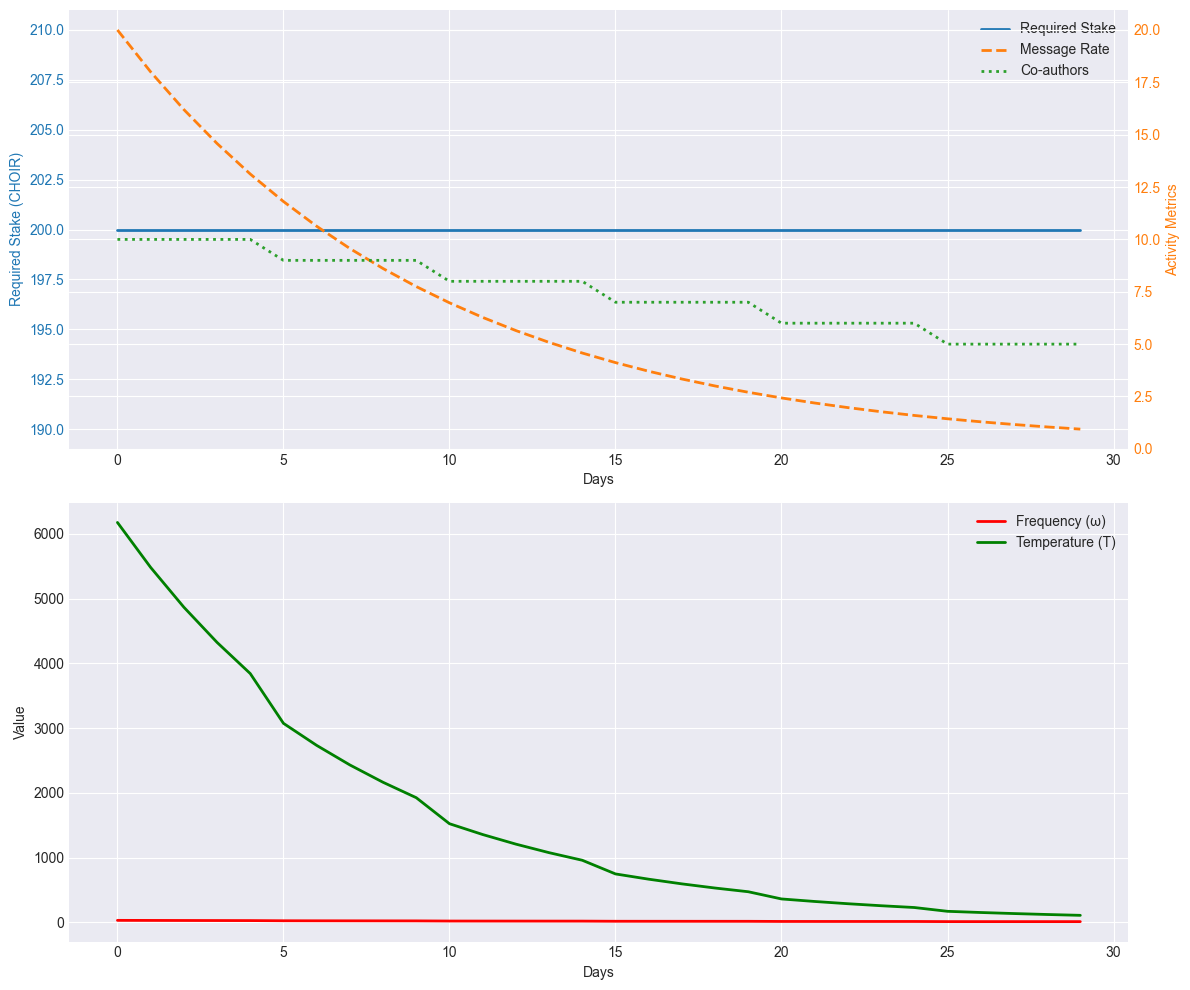


Simulating oscillating: Thread with periodic activity spikes


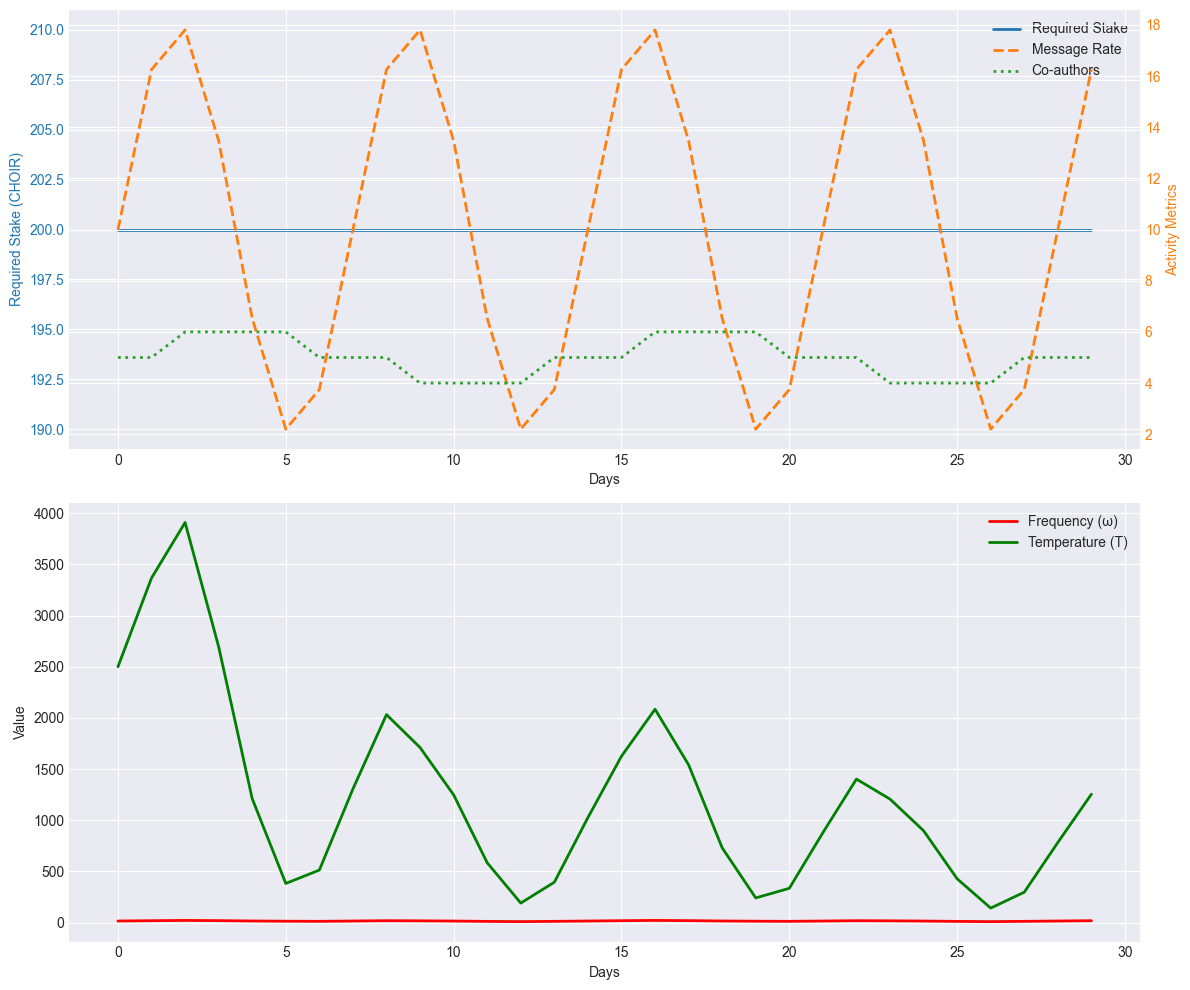

In [15]:
# Add to quantum_harmonic.ipynb

def simulate_thread_scenario(scenario_name: str, days: int = 30):
    """Simulate different thread evolution scenarios"""

    scenarios = {
        "rapid_growth": {
            "description": "Thread experiencing viral growth",
            "day_function": lambda d: Thread(
                message_rate=min(2**((d+1)/7), 30),  # Exponential growth in activity
                co_author_count=min(2 + d//3, 15),   # Linear growth in authors
                token_balance=1000 * (1 + d/10),     # Linear token growth
                approval_rate=0.8,                    # Stable approval
                age_days=d + 1
            )
        },
        "decay": {
            "description": "Thread losing activity and authors",
            "day_function": lambda d: Thread(
                message_rate=max(20 * 0.9**d, 0.1),  # Exponential decay
                co_author_count=max(10 - d//5, 2),   # Linear author loss
                token_balance=10000,                 # Stable tokens
                approval_rate=min(0.8 - d/100, 0.5), # Declining approval
                age_days=d + 30
            )
        },
        "oscillating": {
            "description": "Thread with periodic activity spikes",
            "day_function": lambda d: Thread(
                message_rate=10 + 8*np.sin(2*np.pi*d/7),  # Weekly cycles
                co_author_count=5 + int(2*np.sin(2*np.pi*d/14)),  # Bi-weekly author changes
                token_balance=5000,                       # Stable tokens
                approval_rate=0.8 + 0.1*np.sin(2*np.pi*d/7),  # Weekly approval cycles
                age_days=d + 1
            )
        }
    }

    if scenario_name not in scenarios:
        raise ValueError(f"Unknown scenario: {scenario_name}")

    scenario = scenarios[scenario_name]
    print(f"\nSimulating {scenario_name}: {scenario['description']}")

    # Track metrics over time
    days_range = range(days)
    stakes = []
    frequencies = []
    temperatures = []
    message_rates = []
    co_authors = []

    # Simulate scenario
    for d in days_range:
        thread = scenario["day_function"](d)
        stake = calculate_stake_required(thread)
        ω = calculate_thread_frequency(thread)
        T = calculate_thread_temperature(thread)

        stakes.append(stake)
        frequencies.append(ω)
        temperatures.append(T)
        message_rates.append(thread.message_rate)
        co_authors.append(thread.co_author_count)

    # Visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot 1: Stake and Activity Metrics
    color1, color2, color3 = '#1f77b4', '#ff7f0e', '#2ca02c'
    ax1.plot(days_range, stakes, '-', color=color1, label='Required Stake', linewidth=2)
    ax1_twin = ax1.twinx()
    ax1_twin.plot(days_range, message_rates, '--', color=color2, label='Message Rate', linewidth=2)
    ax1_twin.plot(days_range, co_authors, ':', color=color3, label='Co-authors', linewidth=2)

    ax1.set_xlabel('Days')
    ax1.set_ylabel('Required Stake (CHOIR)', color=color1)
    ax1_twin.set_ylabel('Activity Metrics', color=color2)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1_twin.tick_params(axis='y', labelcolor=color2)

    # Combine legends
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax1_twin.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Plot 2: Frequency and Temperature
    ax2.plot(days_range, frequencies, '-', color='red', label='Frequency (ω)', linewidth=2)
    ax2.plot(days_range, temperatures, '-', color='green', label='Temperature (T)', linewidth=2)

    ax2.set_xlabel('Days')
    ax2.set_ylabel('Value')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Test scenarios
for scenario in ["rapid_growth", "decay", "oscillating"]:
    simulate_thread_scenario(scenario)


Simulating rapid_growth: Thread experiencing viral growth

Day 2 Exit Event:
Tokens Received: 200.00 CHOIR
Average Entry Price: 150.00 CHOIR
Current Stake Price: 200.00 CHOIR
ROI: 33.3%

Day 5 Exit Event:
Tokens Received: 300.00 CHOIR
Average Entry Price: 180.00 CHOIR
Current Stake Price: 106.59 CHOIR
ROI: 66.7%

Day 15 Exit Event:
Tokens Received: 500.00 CHOIR
Average Entry Price: 200.00 CHOIR
Current Stake Price: 52.76 CHOIR
ROI: 150.0%


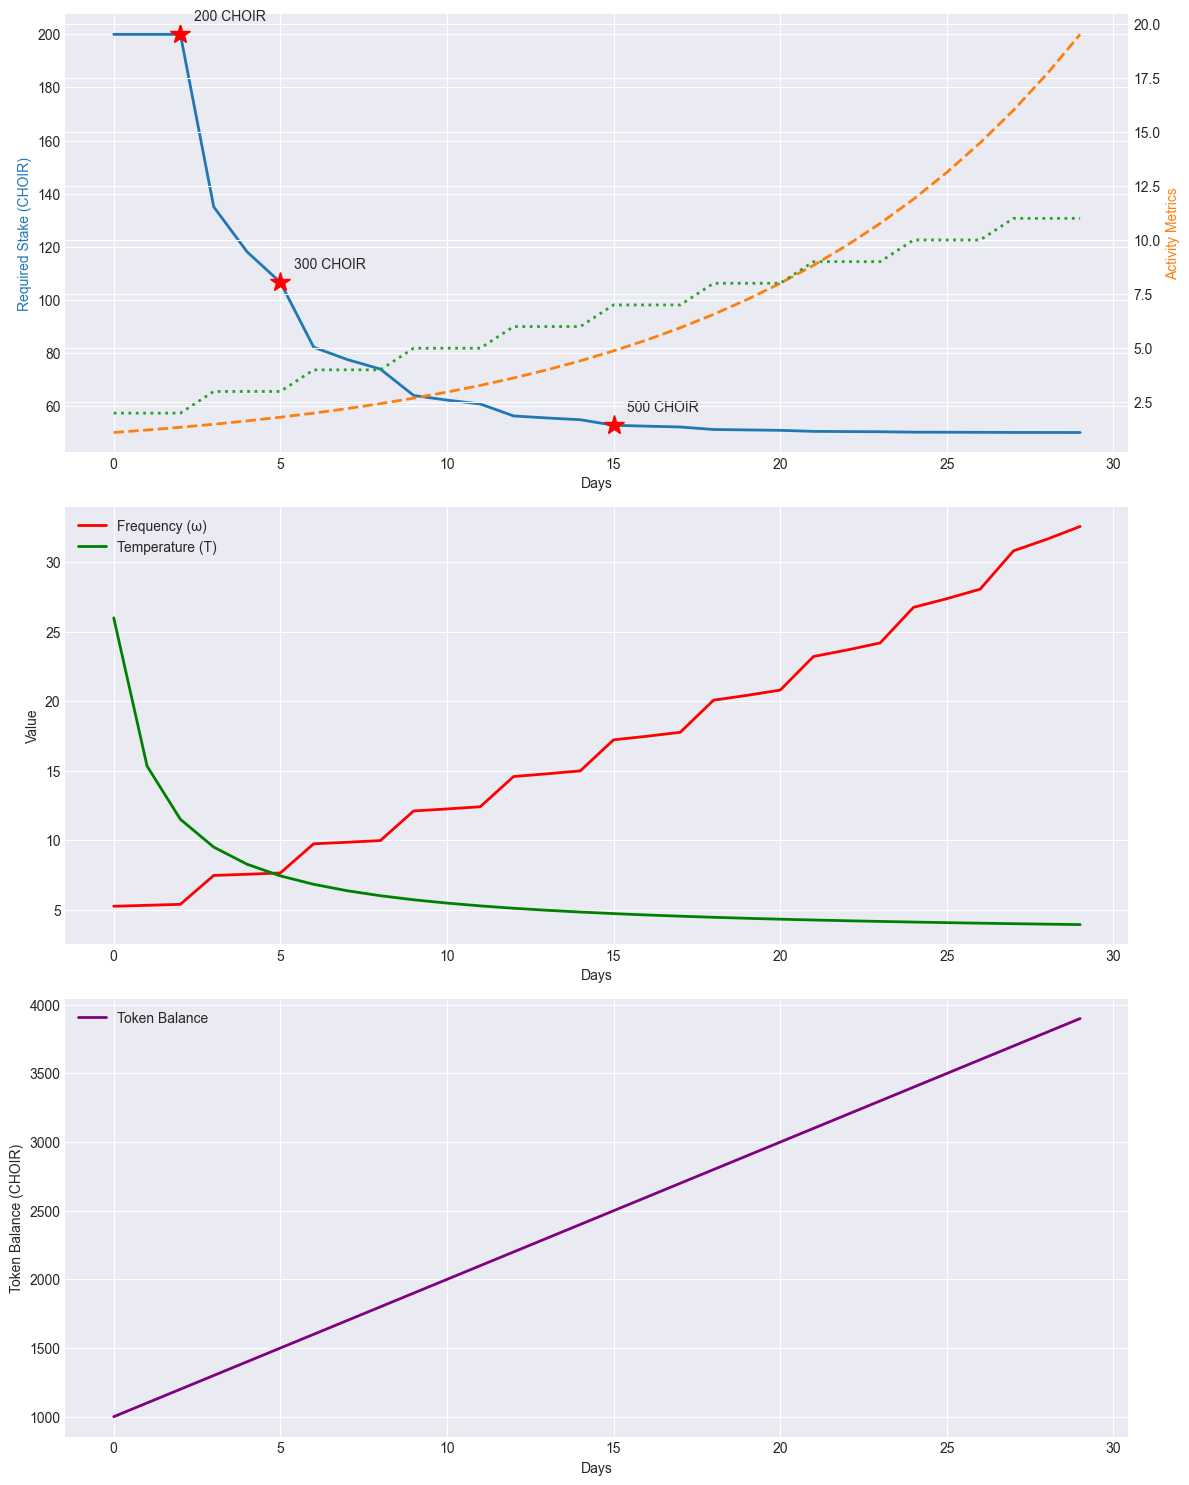


Simulating decay: Thread losing activity and authors

Day 3 Exit Event:
Tokens Received: 1000.00 CHOIR
Average Entry Price: 120.00 CHOIR
Current Stake Price: 54.16 CHOIR
ROI: 733.3%

Day 7 Exit Event:
Tokens Received: 800.00 CHOIR
Average Entry Price: 150.00 CHOIR
Current Stake Price: 55.18 CHOIR
ROI: 433.3%

Day 12 Exit Event:
Tokens Received: 600.00 CHOIR
Average Entry Price: 180.00 CHOIR
Current Stake Price: 56.33 CHOIR
ROI: 233.3%


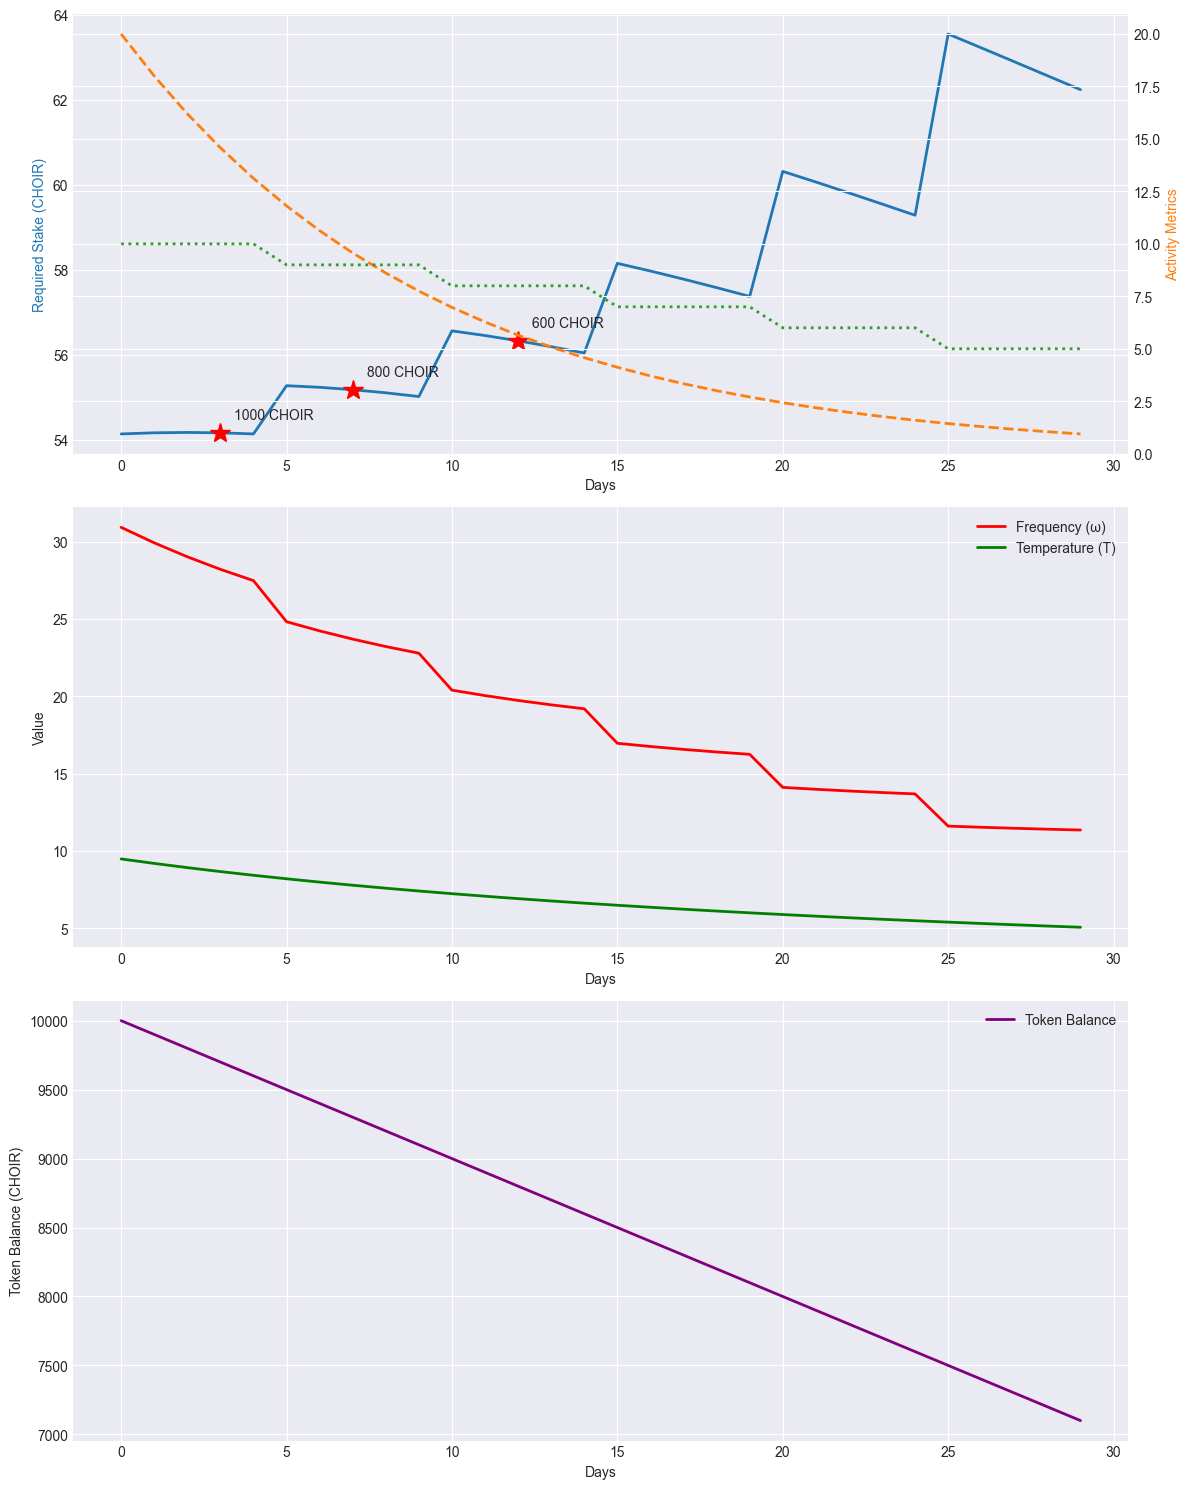


Simulating oscillating: Thread with periodic activity spikes

Day 7 Exit Event:
Tokens Received: 400.00 CHOIR
Average Entry Price: 160.00 CHOIR
Current Stake Price: 101.89 CHOIR
ROI: 150.0%

Day 14 Exit Event:
Tokens Received: 300.00 CHOIR
Average Entry Price: 140.00 CHOIR
Current Stake Price: 67.74 CHOIR
ROI: 114.3%

Day 21 Exit Event:
Tokens Received: 450.00 CHOIR
Average Entry Price: 170.00 CHOIR
Current Stake Price: 57.82 CHOIR
ROI: 164.7%


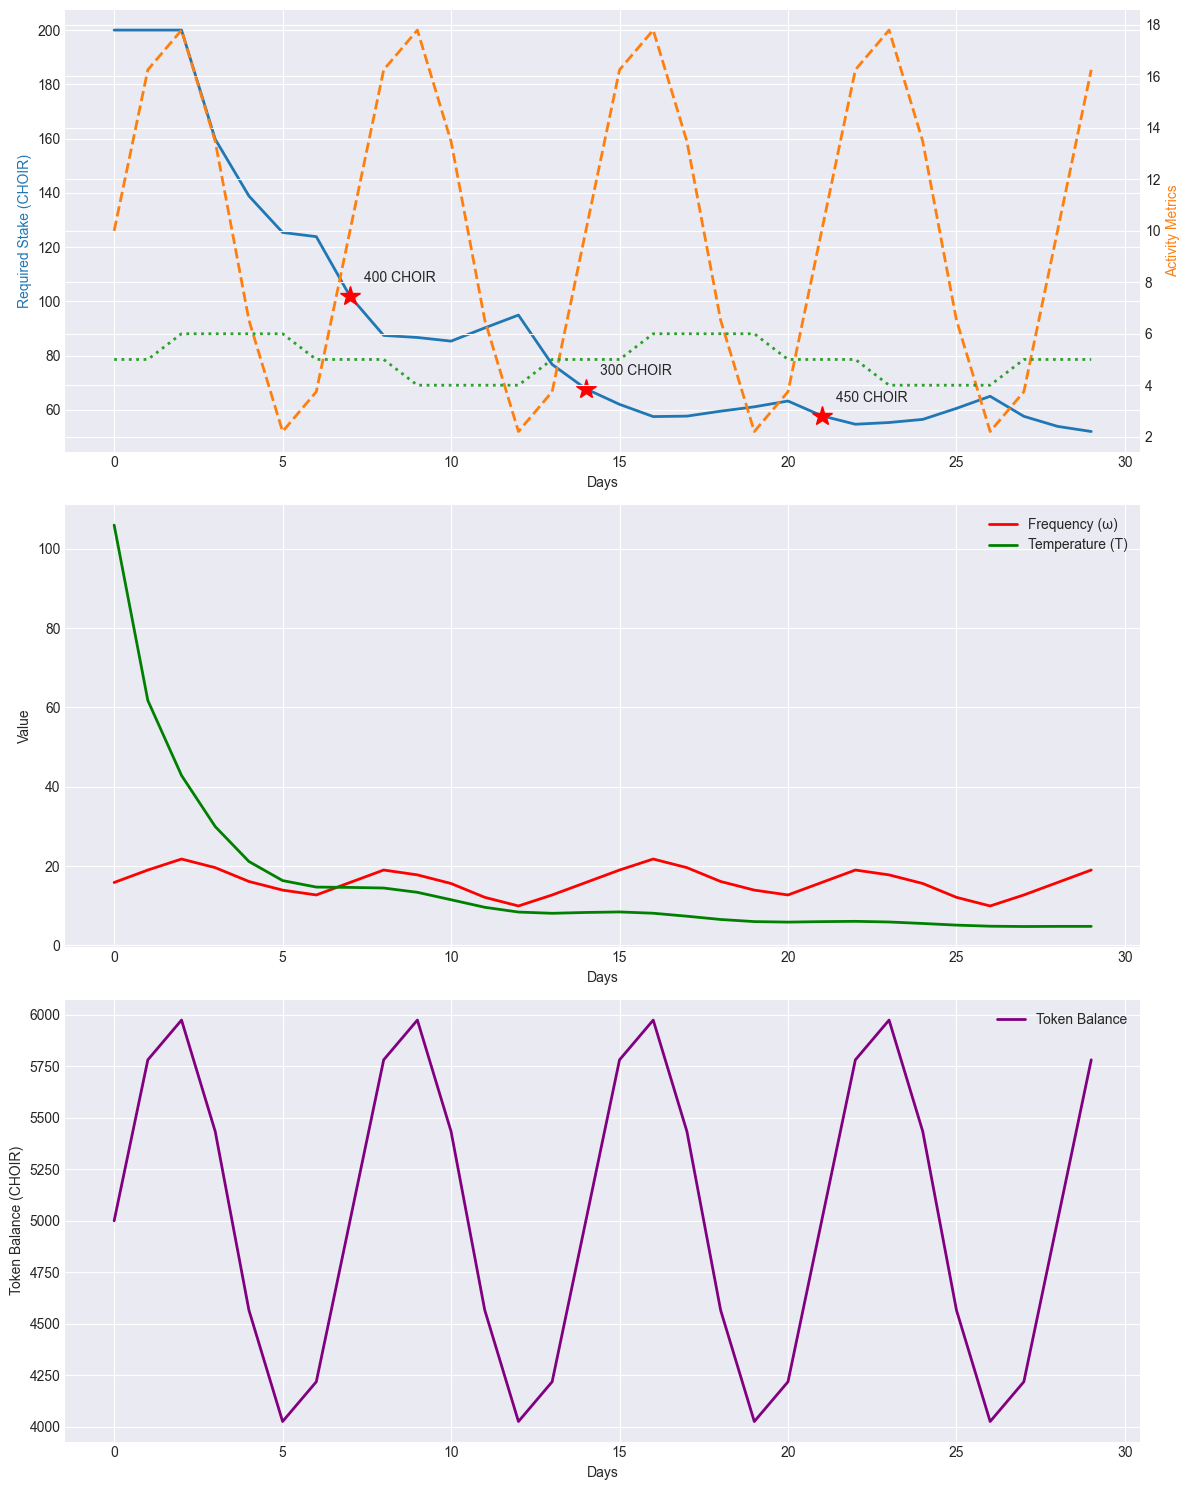

In [11]:
def simulate_thread_scenario(scenario_name: str, days: int = 30):
    """Simulate different thread evolution scenarios with token economics"""

    class ExitEvent:
        def __init__(self, day: int, tokens: float, avg_entry_price: float):
            self.day = day
            self.tokens = tokens
            self.avg_entry_price = avg_entry_price

    scenarios = {
        "rapid_growth": {
            "description": "Thread experiencing viral growth",
            "day_function": lambda d: Thread(
                message_rate=min(2**((d+1)/7), 30),
                co_author_count=min(2 + d//3, 15),
                token_balance=1000 * (1 + d/10),
                approval_rate=0.8,
                age_days=d + 1
            ),
            "exits": [
                ExitEvent(2, 200, 150),   # Early adopter exits
                ExitEvent(5, 300, 180),   # Mid-stage exit
                ExitEvent(15, 500, 200)   # Late-stage exit
            ]
        },
        "decay": {
            "description": "Thread losing activity and authors",
            "day_function": lambda d: Thread(
                message_rate=max(20 * 0.9**d, 0.1),
                co_author_count=max(10 - d//5, 2),
                token_balance=10000 * (1 - d/100),  # Token balance decreases with exits
                approval_rate=min(0.8 - d/100, 0.5),
                age_days=d + 30
            ),
            "exits": [
                ExitEvent(3, 1000, 120),   # First wave exit
                ExitEvent(7, 800, 150),    # Second wave exit
                ExitEvent(12, 600, 180)    # Final wave exit
            ]
        },
        "oscillating": {
            "description": "Thread with periodic activity spikes",
            "day_function": lambda d: Thread(
                message_rate=10 + 8*np.sin(2*np.pi*d/7),
                co_author_count=5 + int(2*np.sin(2*np.pi*d/14)),
                token_balance=5000 + 1000*np.sin(2*np.pi*d/7),
                approval_rate=0.8 + 0.1*np.sin(2*np.pi*d/7),
                age_days=d + 1
            ),
            "exits": [
                ExitEvent(7, 400, 160),    # Exit at peak
                ExitEvent(14, 300, 140),   # Exit at trough
                ExitEvent(21, 450, 170)    # Exit at peak
            ]
        }
    }

    scenario = scenarios[scenario_name]
    print(f"\nSimulating {scenario_name}: {scenario['description']}")

    # Track metrics
    days_range = range(days)
    stakes = []
    frequencies = []
    temperatures = []
    message_rates = []
    co_authors = []
    token_balances = []

    # Track exit events
    exit_days = [e.day for e in scenario["exits"]]
    exit_stakes = [e.tokens for e in scenario["exits"]]
    exit_prices = [e.avg_entry_price for e in scenario["exits"]]

    # Simulate scenario
    for d in days_range:
        thread = scenario["day_function"](d)
        stake = calculate_stake_required(thread)
        ω = calculate_thread_frequency(thread)
        T = calculate_thread_temperature(thread)

        stakes.append(stake)
        frequencies.append(ω)
        temperatures.append(T)
        message_rates.append(thread.message_rate)
        co_authors.append(thread.co_author_count)
        token_balances.append(thread.token_balance)

        # Print exit events
        if d in exit_days:
            idx = exit_days.index(d)
            print(f"\nDay {d} Exit Event:")
            print(f"Tokens Received: {exit_stakes[idx]:.2f} CHOIR")
            print(f"Average Entry Price: {exit_prices[idx]:.2f} CHOIR")
            print(f"Current Stake Price: {stake:.2f} CHOIR")
            print(f"ROI: {((exit_stakes[idx]/exit_prices[idx]) - 1)*100:.1f}%")

    # Visualization
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

    # Plot 1: Stake and Activity Metrics
    color1, color2, color3 = '#1f77b4', '#ff7f0e', '#2ca02c'
    ax1.plot(days_range, stakes, '-', color=color1, label='Required Stake', linewidth=2)
    ax1_twin = ax1.twinx()
    ax1_twin.plot(days_range, message_rates, '--', color=color2, label='Message Rate', linewidth=2)
    ax1_twin.plot(days_range, co_authors, ':', color=color3, label='Co-authors', linewidth=2)

    # Mark exit events
    for d, tokens in zip(exit_days, exit_stakes):
        ax1.plot(d, stakes[d], 'r*', markersize=15, label='Exit Event' if d == exit_days[0] else "")
        ax1.annotate(f'{tokens:.0f} CHOIR', (d, stakes[d]), xytext=(10, 10),
                    textcoords='offset points')

    ax1.set_xlabel('Days')
    ax1.set_ylabel('Required Stake (CHOIR)', color=color1)
    ax1_twin.set_ylabel('Activity Metrics', color=color2)

    # Plot 2: Frequency and Temperature
    ax2.plot(days_range, frequencies, '-', color='red', label='Frequency (ω)', linewidth=2)
    ax2.plot(days_range, temperatures, '-', color='green', label='Temperature (T)', linewidth=2)
    ax2.set_xlabel('Days')
    ax2.set_ylabel('Value')
    ax2.legend()

    # Plot 3: Token Balance
    ax3.plot(days_range, token_balances, '-', color='purple', label='Token Balance', linewidth=2)
    ax3.set_xlabel('Days')
    ax3.set_ylabel('Token Balance (CHOIR)')
    ax3.legend()

    plt.tight_layout()
    plt.show()

# Test scenarios
for scenario in ["rapid_growth", "decay", "oscillating"]:
    simulate_thread_scenario(scenario)